In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
import pandas as pd

In [14]:
class GradientDescent:
    
    def __init__(self, lr=0.01, max_iter=1000, batch_size=10, tol=1e-3,theta=None):
        """
        Initializes the SGD optimizer.

        Parameters:
        - lr: Learning rate.
        - max_iter: Maximum number of iterations.
        - batch_size: Size of the mini-batch used in each iteration.
        - tol: Tolerance for convergence.
        - theta: Initial values for optimization.
        
        """
        self.learning_rate = lr
        self.max_iteration = max_iter
        self.batch_size = batch_size
        self.tolerance_convergence = tol
        self.theta = np.array(theta)

In [11]:
    def fit(self, x_val, y_val):
        
        x1 = x_val #self.theta[0]
        y1 = y_val #self.theta[1]
        
        for _ in range(self.max_iteration): 
            grad = self.gradient(x1,y1)
            x1, y1 = grad

            if np.linalg.norm(grad) < self.tolerance_convergence:
                break

        self.theta = np.array([x1,y1])
        return grad

    def gradient(self, x1, y1):
        
        x_grad = rgi_x(np.array([x1,y1]))[0]
        y_grad = rgi_y(np.array([x1,y1]))[0]
        
        x1 = x1 - self.learning_rate*x_grad
        y1 = y1 - self.learning_rate*y_grad
        
        self.theta = list([self.theta[0],self.theta[1]])
        
        return x1,y1

In [12]:
def cost_function(x, y):
    term1 = 1.8 - np.exp(-0.1 * (2.5 * (x + 3)**2 + (y + 3)**2))
    term2 = -1.5 * np.exp(-0.05 * (2.5 * (x - 3)**2 + (y - 3)**2))
    return term1 + term2


# Create a 2D grid
x_values = np.arange(-8, 8.1, 0.1)
y_values = np.arange(-8, 8.1, 0.1)
X_grid, Y_grid = np.meshgrid(x_values, y_values)
grid = np.array(np.meshgrid(x_values, y_values)).T.reshape(-1,2)
values = cost_function(grid[:,0],grid[:,1])

interpolator = RegularGridInterpolator((x_values,y_values),values.reshape(161,161))

x=np.linspace(-8, 8,161)
y=np.linspace(-8, 8,161)

X,Y=np.meshgrid(x,y)

Z=cost_function(X,Y)
grad=np.gradient(Z)
rgi_x = RegularGridInterpolator((x, y), grad[0])
rgi_y = RegularGridInterpolator((x, y), grad[1])

# Calculate the cost values on the grid
Z_grid = interpolator((X_grid,Y_grid))#cost_on_grid(X_grid, Y_grid)


initial_points = [np.random.uniform(low=0,high=8,size=2),np.random.uniform(low=0,high=8,size=2),np.random.uniform(low=0,high=8,size=2)]

Initial points (3.992701518522459, 7.383153747985337) and initial z 1.2925313574352035
End points [2.999974017788742, 2.9999726141368472] and z at that point 0.2999973197691665
Initial points (0.44319464533188757, 5.060669064760679) and initial z 1.264063317052074
End points [2.999971682304134, 2.999972614001472] and z at that point 0.2999973635058659
Initial points (4.163432927657361, 4.719320540633701) and initial z 0.7077749523760425
End points [2.9999734238089455, 2.9999726141024254] and z at that point 0.2999973308926462


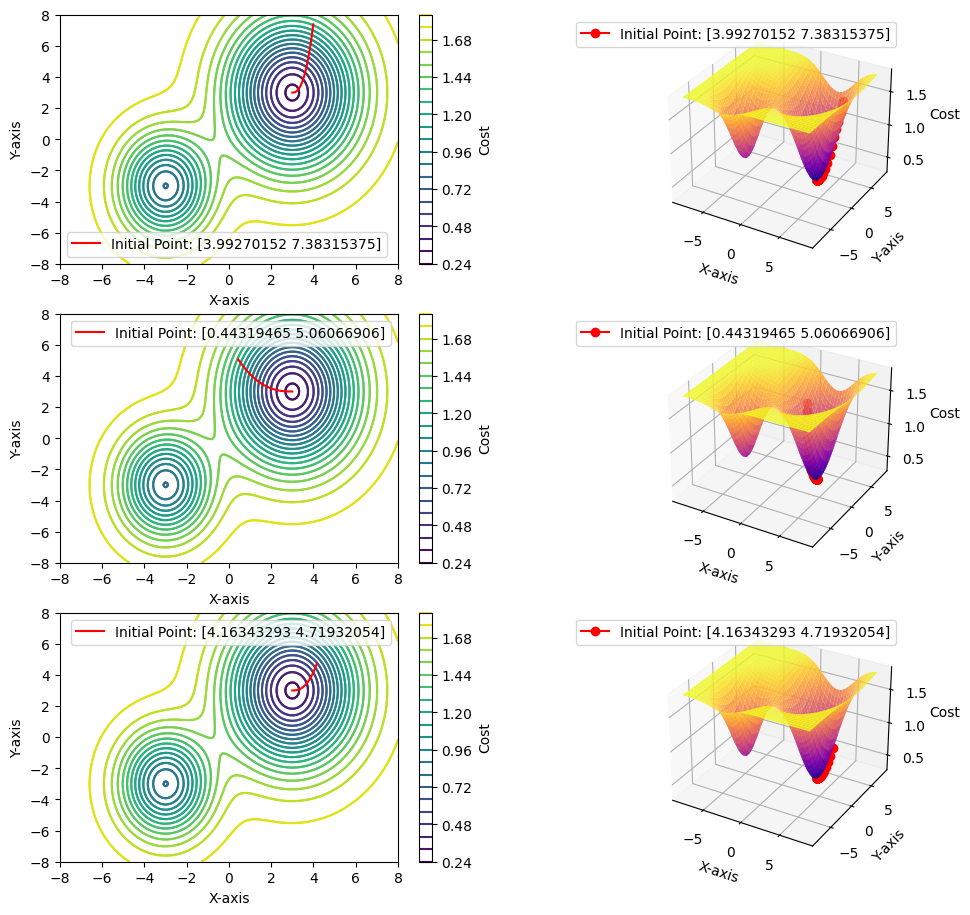

In [15]:
fig = plt.figure(figsize=(12,11))

i=-1
for initial_point in initial_points:
    i+=1
    model = GradientDescent(lr=0.1, max_iter=100, batch_size=10, tol=1e-5,theta=initial_point)
    model.theta = initial_point
    trajectory_x = np.zeros(model.max_iteration)
    trajectory_x[0] = model.theta[0]
    trajectory_y = np.zeros(model.max_iteration)
    trajectory_y[0] = model.theta[1]
    trajectory_z = np.zeros(model.max_iteration)
    trajectory_z[0] = interpolator((model.theta[0], model.theta[1]))
    
    print("Initial points {} and initial z {}".format((initial_point[0],initial_point[1]),trajectory_z[0]))

      
    for k in range(model.max_iteration-1):
        
        model.theta = model.fit(model.theta[0], model.theta[1])
        
        trajectory_x[k+1] = model.theta[0]

        trajectory_y[k+1] = model.theta[1]
        
        trajectory_z[k+1] = interpolator((model.theta[0], model.theta[1]))
        
    for j in range(2):
            
        if j == 1:
            ax = fig.add_subplot(3, 2, i * 2 + j + 1, projection='3d')
            ax.plot_surface(X_grid, Y_grid, Z_grid, cmap='plasma', alpha=0.9)
            ax.set_xlabel('X-axis')
            ax.set_ylabel('Y-axis')
            ax.set_zlabel('Cost')
            ax.plot(trajectory_x, trajectory_y, trajectory_z, marker="o",label=f'Initial Point: {initial_point}',color="r")
            handles, labels = plt.gca().get_legend_handles_labels()
            by_label = dict(zip(labels, handles))
            plt.legend(by_label.values(), by_label.keys())
            #ax.set_title('Cost Function Surface (3D)')
            
        else:
            ax = fig.add_subplot(3, 2, i * 2 + j + 1)
            contour = ax.contour(X_grid, Y_grid, Z_grid, levels=20, cmap='viridis')
            ax.set_xlabel('X-axis')
            ax.set_ylabel('Y-axis')
            #ax.set_title('Stochastic Gradient Descent Trajectories (2D)')
            plt.colorbar(contour,label="Cost")
            plt.contour(X_grid, Y_grid, Z_grid, levels=20, cmap='viridis')
            ax.plot(trajectory_x, trajectory_y, label=f'Initial Point: {initial_point}',color="r")
            handles, labels = plt.gca().get_legend_handles_labels()
            by_label = dict(zip(labels, handles))
            plt.legend(by_label.values(), by_label.keys())
            
    print("End points {} and z at that point {}".format([trajectory_x[-1],trajectory_y[-1]],trajectory_z[-1]))

plt.show()